#### Missing Values- Feature Engineering

Lifecycle of a Data Science Projects

Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys
Feature Engineering---Handling Missing Values
Why are their Missing values?? Survey--Depression Survey

They hesitate to put down the information
Survey informations are not that valid
Men--salary
Women---age
People may have died----NAN
Data Science Projects---Dataset should be collected from multiple sources

#### What are the different types of Missing Data?

Missing Completely at Random, MCAR: A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.isnull().sum()

# age has 177 missing record, cabin 687 and embarked has 2 null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Missing data not at random (MNAR) : Systematic missing Values

There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset

In [12]:
# adding a col with values 1 where null values are there
import numpy as np

df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)

## find the percentage of null values (add all 1 and divide it by total)
df['cabin_null'].mean()

0.7710437710437711

In [16]:
# 1 means survived, 0 means non survived
# from survived 60% has missing values
# and for non survived 87 % has missing values

df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### Missing at random (MAR)

### All the techniques of handling missing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

#### 1. Mean/ Median /Mode imputation
When should we apply? 
Mean/median imputation has the assumption that the data are missing completely at random(MCAR). 
We solve this by replacing the NAN with the most frequent occurance of the variables

In [26]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [28]:
# percentage of missing values

#df.isnull().sum()
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [38]:
# fill the missing values with median of dataset
#new col will be created variableName_median

def impute_nan(df,variable,median):
    df[variable+"_median"] = df[variable].fillna(median)

In [39]:
median = df.Age.median()
median

28.0

In [41]:
# All the missing values in Age_median col wil be replaced by median value

impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [46]:
# change in std deviation after replacing the null values
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

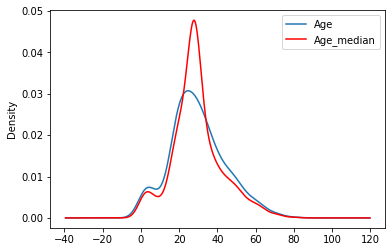

In [52]:
# kde  = kernel density estimator

fig = plt.figure()
ax =fig.add_subplot(111)

df['Age'].plot(kind ='kde', ax = ax)
df.Age_median.plot(kind = 'kde', ax=ax , color = 'red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

#### Advantages And Disadvantages of Mean/Median Imputation

1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset 
#### Disadvantages

3. Change or Distortion in the original variance
4. Impacts Correlation

#### 2. Random Sample Imputation

Random Sample Imputation consist of taking random observation from dataset, and we use this to replace nan values.

When it should be used ?
It assumes the data are missing completely at random (MCAR)

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])

In [4]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [8]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
df['Age'].isnull().sum()

177

In [15]:
#drop all the nan values in age, then pick sample values from not null values
# and then replace all the null values with some random not null values that is picked
r_Sample=df['Age'].dropna().sample(df['Age'].isnull().sum(),random_state=0)

In [18]:
r_Sample.index

Int64Index([423, 177, 305, 292, 889, 595, 637,  54, 456, 110,
            ...
            179,  24, 630, 458,  49, 539, 267, 352,  99, 689],
           dtype='int64', length=177)

In [26]:
df[df['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [12]:
def impute_nan(df,variable,median):
    df[variable+'_median'] = df[variable].fillna(median)
    df[variable+'_random'] = df[variable]
    # it will have random sample to fill the na
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    
    # pandas need to have the same index in order to merge the dataset
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random'] = random_sample

In [27]:
median = df.Age.median()

In [28]:
median

28.0

In [29]:
impute_nan(df,'Age',median)

In [30]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

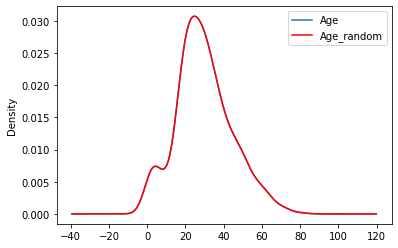

In [36]:
# almost no distortion

fig = plt.figure()
ax =fig.add_subplot(111)

df['Age'].plot(kind ='kde', ax = ax)
df.Age_random.plot(kind = 'kde', ax=ax , color = 'red')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc = 'best')

#### Advantages
1. Easy to implement
2. Very less distortion in variance

#### Disadvantage
1. In every situation randomness won't work


#### 3. Capture NAN values with a new feature

It works well when the data is not missing completely at random

In [38]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [40]:
import numpy as np
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)

In [41]:
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [43]:
df['Age'].fillna(df['Age'].median(), inplace = True)

In [46]:
df.head(10)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
1. Easy to implement
2. Capture the imp of missing values

#### Disadvantages
1. Creating additional features(columns)

#### 4.  End of Distribution Imputation

IN this we take the far end of the distribution and replace missing values with this data.
Replace missing data with values that are at the tails of the distribution (After 3rd std deviation) of the variable.

In [48]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


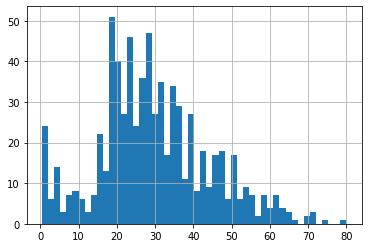

In [51]:
df.Age.hist(bins=50)

In [57]:
extreme = df.Age.mean()+3*df.Age.std()

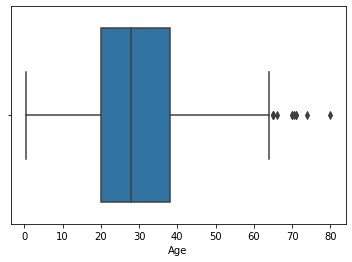

In [58]:
import seaborn as sns
sns.boxplot('Age',data =df)

In [63]:
def impute_nan(df,variable,median,extreme):
    df[variable+'_end_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)

In [64]:
impute_nan(df,'Age',df.Age.median(),extreme)

In [65]:
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


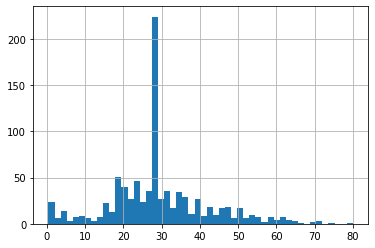

In [66]:
df['Age'].hist(bins=50)

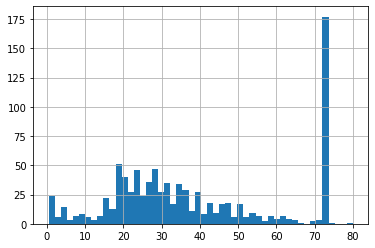

In [67]:
df['Age_end_distribution'].hist(bins=50)

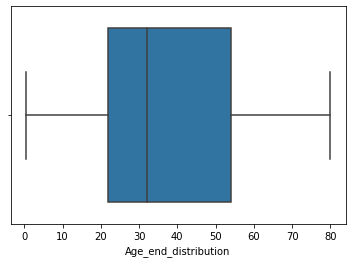

In [70]:
# outliers are captured/gone, this gives proper distribution
sns.boxplot('Age_end_distribution',data=df)

#### Advantages

1. Easy to implement
2. Captures the importance of misingness if there is one

#### Disadvantages

1. Distorts the original distribution of the variable
2. If the missingness is not important, it may mask the predictive power of the original variable by distorting its distribution
3. If the number of NA is big, it will mask true outliers in the distribution
4. If the number of NA is small, the replaced NA may be considered an outlier and pre-processed in a subsequent feature engineering 

#### 5. Arbitrary Value Imputation

In this NAN values are replaced with arbitrary value

In [72]:
import pandas as pd

In [78]:
df = pd.read_csv('titanic.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [81]:
def impute_nan(df,variable):
    df[variable+'_zero'] = df[variable].fillna(0)
    df[variable+'_hundred'] = df[variable].fillna(100)

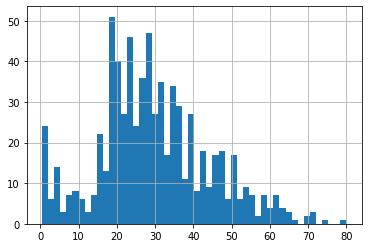

In [82]:
df['Age'].hist(bins=50)

#### Arbitrary values - It should not be more frequently present

#### Advantages

1. Easy to Implement
2. Captures the importance of missingness if there is one

#### Disadvantages

1. Distorts the original distribution of the variable
2. If the missingness is not important, it may mask the predictive power of the original variable by distorting it's distribution
3. Hard to decide which value to use